<a href="https://colab.research.google.com/github/DSYMaO/STA365/blob/main/Project_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt; import pymc as pm;
import pandas as pd; import arviz as az


In [34]:
from google.colab import files

uploaded = files.upload()


Saving CC GENERAL.csv to CC GENERAL.csv


In [4]:
df = pd.read_csv('age_std_suicide_rates_1990-2022.csv')

df = pd.read_csv('CC GENERAL.csv')
print(df)

     CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0       

In [5]:
cleaned_df = df.dropna()
cleaned_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
x1 = cleaned_df['BALANCE']
x2 = cleaned_df['PURCHASES_FREQUENCY']
x3 = cleaned_df['PURCHASES']
n = len(x1)

y_obs = np.zeros((n,1))
intercept = np.ones((n,1))
X = np.zeros((len(x1),4))

X[:, 0] = intercept.reshape(-1)
X[:,1] = (x1-np.mean(x1))/np.std(x1)
X[:,2] = (x2-np.mean(x2))/np.std(x2)
X[:,3] = (x3-np.mean(x3))/np.std(x3)

In [59]:
#with pm.Model() as MLR:
#    betas = pm.MvNormal('betas', mu= np.zeros((4,1)), cov=np.eye(4), shape=(4,1))
#    y = pm.Bernoulli('y', logit_p = pm.math.dot(X, betas), observed = y_obs)
#with MLR:
#    idata = pm.sample()


with pm.Model() as MLR:
  betas = pm.MvNormal('betas', mu= np.zeros((4,1)), cov=np.eye(4), shape=(4,1))
  sigma = pm.TruncatedNormal('sigma', mu=1, sigma=1, lower=0)
  y = pm.Normal('y', mu=pm.math.dot(X, betas), sigma=sigma, observed=y_obs)

with MLR:
    idata2 = pm.sample()


In [61]:
with pm.Model() as MLR:
  betas = pm.MvNormal('betas', mu= np.zeros((4,1)), cov=np.eye(4), shape=(4,1))
  sigma = pm.Gamma('sigma', alpha=1, beta=0.5)
  y = pm.Normal('y', mu=pm.math.dot(X, betas), sigma=sigma, observed=y_obs)

with MLR:
    idata = pm.sample()

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"betas[0, 0]",0.0,0.0,-0.0,0.0,0.0,0.0,3144.0,59.0,1.14
"betas[0, 1]",-0.0,0.0,-0.0,0.0,0.0,0.0,3854.0,78.0,1.19
"betas[0, 2]",0.0,0.0,-0.0,0.0,0.0,0.0,2961.0,74.0,1.22
"betas[0, 3]",0.0,0.0,-0.0,0.0,0.0,0.0,3655.0,76.0,1.18
"betas[1, 0]",0.0,0.0,-0.0,0.0,0.0,0.0,3075.0,64.0,1.17
"betas[1, 1]",0.0,0.0,-0.0,0.0,0.0,0.0,3399.0,70.0,1.18
"betas[1, 2]",-0.0,0.0,-0.0,0.0,0.0,0.0,3021.0,53.0,1.21
"betas[1, 3]",0.0,0.0,-0.0,0.0,0.0,0.0,2847.0,69.0,1.15
"betas[2, 0]",0.0,0.0,-0.0,0.0,0.0,0.0,3168.0,66.0,1.16
"betas[2, 1]",0.0,0.0,-0.0,0.0,0.0,0.0,2703.0,61.0,1.14


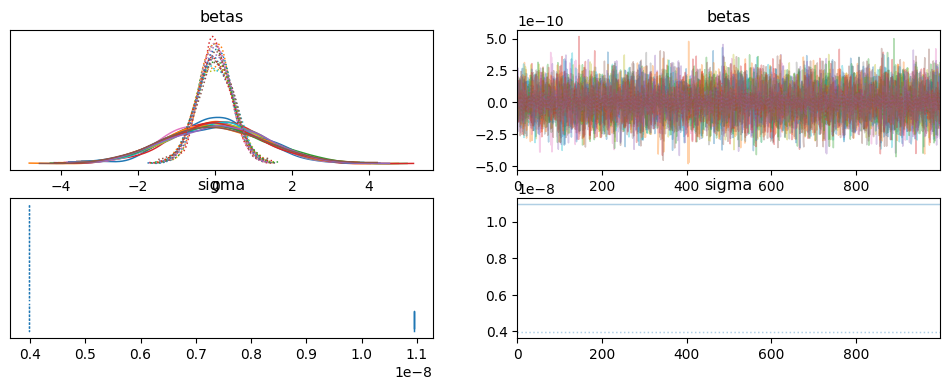

In [60]:
az.plot_trace(idata2)

summary = az.summary(idata2, var_names=['betas'])
summary

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"betas[0, 0]",-0.0,0.0,-0.0,0.0,0.0,0.0,3460.0,403.0,1.07
"betas[0, 1]",0.0,0.0,-0.0,0.0,0.0,0.0,3842.0,96.0,1.09
"betas[0, 2]",0.0,0.0,-0.0,0.0,0.0,0.0,3424.0,149.0,1.07
"betas[0, 3]",-0.0,0.0,-0.0,0.0,0.0,0.0,3000.0,551.0,1.09
"betas[1, 0]",0.0,0.0,-0.0,0.0,0.0,0.0,2788.0,208.0,1.07
"betas[1, 1]",-0.0,0.0,-0.0,0.0,0.0,0.0,3229.0,127.0,1.09
"betas[1, 2]",0.0,0.0,-0.0,0.0,0.0,0.0,3122.0,84.0,1.08
"betas[1, 3]",-0.0,0.0,-0.0,0.0,0.0,0.0,3649.0,87.0,1.07
"betas[2, 0]",-0.0,0.0,-0.0,0.0,0.0,0.0,3544.0,119.0,1.09
"betas[2, 1]",0.0,0.0,-0.0,0.0,0.0,0.0,3478.0,396.0,1.08


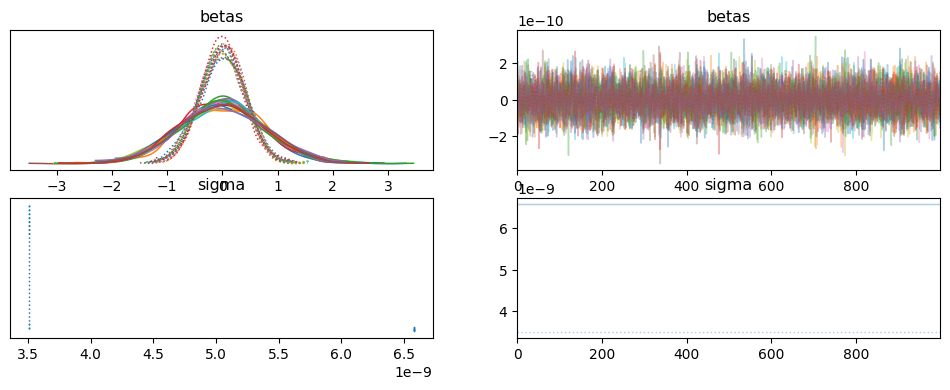

In [62]:
az.plot_trace(idata)

summary = az.summary(idata, var_names=['betas'])
summary

In [7]:
m = len(x1); q = 4; betas = np.zeros((m,1)); betas[0:q,0] = np.linspace(2, q+1, q); np.random.seed(2);
n = 10; y_obs = X.dot(betas).flatten() + stats.norm().rvs(size=n)

with pm.Model() as lasso:
    beta = pm.Laplace('beta', mu=0, b=1, shape=m); beta0 = pm.Normal('beta0', mu=0, sigma=10); sigma = pm.HalfNormal('sigma', sigma=100)
    y = pm.Normal('y', mu=beta0+pm.math.dot(X, beta), sigma=sigma, observed=y_obs)
    idata3 = pm.sample()


ValueError: shapes (8636,4) and (8636,1) not aligned: 4 (dim 1) != 8636 (dim 0)